In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from fsse import FSSE, ReadReactions

conversion_dict = {}
fsse_dict = {}
norm_dict = {}
raw_norm_dict = {}

PATH = os.getcwd()

### DGEBA-P4A

/home/markjenei/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


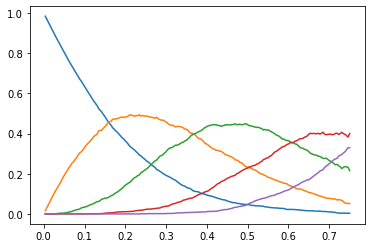

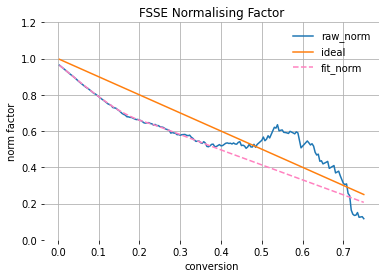

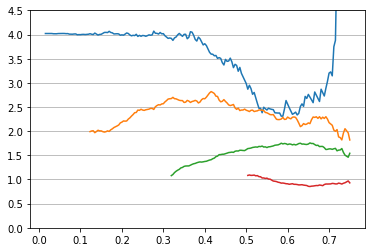

In [2]:
data_dir = PATH + "/data/DGEBA_P4A/outfiles/"
monomer_keys = data_dir + "/monomer_keys.txt"
reaction_names = ["Primary", "Secondary"]
rr = ReadReactions("MD", data_dir, monomer_keys, reaction_names, n_runs=20)

fsse = FSSE(loads=[130, 65], funcs=[2, 4], reactions=rr.reactions)

conv, distr = fsse.degree_distribution()

for i in range(3, 8):
    plt.plot(conv, distr[i])
plt.show()

name = "dgeba-p4a"
norm_dict[name], raw_norm_dict[name] = fsse.norm(monomer_type_idx=1, conv_cutoff=0.38, smooth_factors=[0.3, 0.3], plot=True)
conversion_dict[name], fsse_dict[name] = fsse.fsse(monomer_type_idx=1, smooth_method="savgol", smooth_factors=[0.3, 41, 111, 65],
                                                 norm=norm_dict[name], savgol_deg=[3, 1, 3, 2])

for i in range(len(conversion_dict[name])):
    plt.plot(conversion_dict[name][i], fsse_dict[name][i])
plt.ylim([0, 4.5])
plt.grid(axis='y')

### DGEBA-P5A

/home/markjenei/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


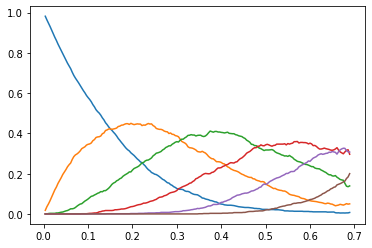

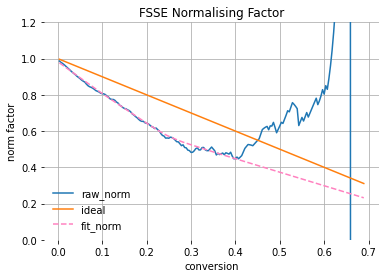

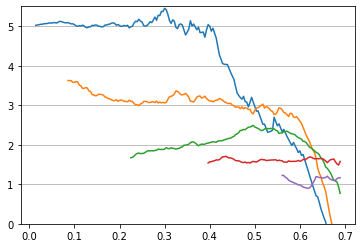

In [3]:
data_dir = PATH + "/data/DGEBA_P5A/outfiles/"
monomer_keys = data_dir + "/monomer_keys.txt"
reaction_names = ["Primary", "Secondary"]
rr = ReadReactions("MD", data_dir, monomer_keys, reaction_names, n_runs=19)

fsse = FSSE(loads=[140, 56], funcs=[2, 5], reactions=rr.reactions)

conv, distr = fsse.degree_distribution()

for i in range(3, 9):
    plt.plot(conv, distr[i])
plt.show()

name = "dgeba-p5a"
norm_dict[name], raw_norm_dict[name] = fsse.norm(monomer_type_idx=1, conv_cutoff=0.38, smooth_factors=[0.3, 0.5], plot=True)
conversion_dict[name], fsse_dict[name] = fsse.fsse(monomer_type_idx=1, smooth_method="savgol", smooth_factors=[0.3, 121, 131, 81, 31],
                                                 norm=norm_dict[name], savgol_deg=[2, 3, 2, 2, 0])

for i in range(len(conversion_dict[name])):
    plt.plot(conversion_dict[name][i], fsse_dict[name][i])
plt.ylim([0, 5.5])
plt.grid(axis='y')

### DGEBA-P6A

/home/markjenei/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


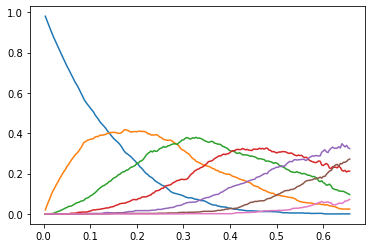

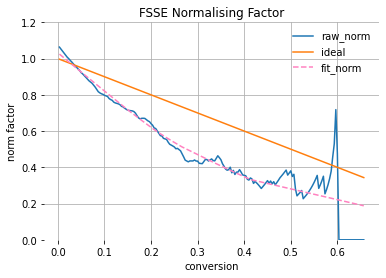

/home/markjenei/polymerisation-substitution-effect/post_process.py:328: RuntimeWarning: divide by zero encountered in true_divide
  fsse.append(reaction_rate / distr[i + offset][idx:])


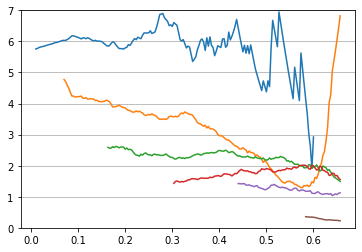

In [4]:
data_dir = PATH + "/data/DGEBA_P6A/outfiles/"
monomer_keys = data_dir + "/monomer_keys.txt"
reaction_names = ["Primary", "Secondary"]
rr = ReadReactions("MD", data_dir, monomer_keys, reaction_names, n_runs=17)

fsse = FSSE(loads=[150, 50], funcs=[2, 6], reactions=rr.reactions)

conv, distr = fsse.degree_distribution()

for i in range(3, 10):
    plt.plot(conv, distr[i])
plt.show()

name = "dgeba-p6a"
norm_dict[name], raw_norm_dict[name] = fsse.norm(monomer_type_idx=1, conv_cutoff=0.42, smooth_factors=[0.55, 0.7], plot=True)
conversion_dict[name], fsse_dict[name] = fsse.fsse(monomer_type_idx=1, smooth_method="savgol", smooth_factors=[0.55, 161, 131, 61, 31, 23],
                                                 norm=norm_dict[name], savgol_deg=[2, 3, 2, 2, 1, 0])

for i in range(len(conversion_dict[name])):
    plt.plot(conversion_dict[name][i], fsse_dict[name][i])
plt.ylim([0, 7])
plt.grid(axis='y')

### Summary

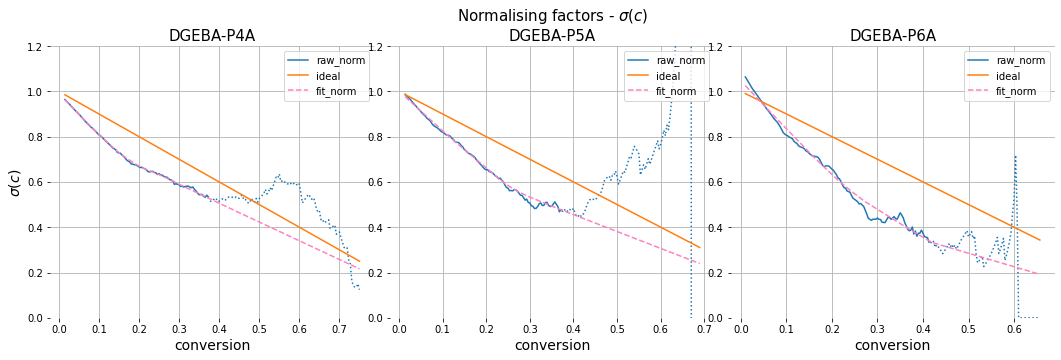

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.05)

c = conversion_dict["dgeba-p4a"][0]
norm_factor = norm_dict["dgeba-p4a"]
raw_norm = raw_norm_dict["dgeba-p4a"]
c_cutoff = 0.38
idx = np.nonzero(c <= c_cutoff)[0][-1]
ax[0].plot(c[:idx], raw_norm[:idx], label='raw_norm')
ax[0].plot(c[idx:], raw_norm[idx:idx + len(c[idx:])], color="tab:blue", ls=':')
ax[0].plot(c, (1 - c), label='ideal')
ax[0].plot(c, norm_factor[:len(c)], ls='--', color='xkcd:pink', label='fit_norm')
ax[0].set_title("DGEBA-P4A", fontsize=15)
ax[0].set_ylabel("$\sigma(c)$", fontsize=14)

c = conversion_dict["dgeba-p5a"][0]
norm_factor = norm_dict["dgeba-p5a"]
raw_norm = raw_norm_dict["dgeba-p5a"]
c_cutoff = 0.38
idx = np.nonzero(c <= c_cutoff)[0][-1]
ax[1].plot(c[:idx], raw_norm[:idx], label='raw_norm')
ax[1].plot(c[idx:], raw_norm[idx:idx + len(c[idx:])], color="tab:blue", ls=':')
ax[1].plot(c, (1 - c), label='ideal')
ax[1].plot(c, norm_factor[:len(c)], ls='--', color='xkcd:pink', label='fit_norm')
ax[1].set_title("Normalising factors - $\sigma(c)$\nDGEBA-P5A", fontsize=15)

c = conversion_dict["dgeba-p6a"][0]
norm_factor = norm_dict["dgeba-p6a"]
raw_norm = raw_norm_dict["dgeba-p6a"]
c_cutoff = 0.42
idx = np.nonzero(c <= c_cutoff)[0][-1]
ax[2].plot(c[:idx], raw_norm[:idx], label='raw_norm')
ax[2].plot(c[idx:], raw_norm[idx:idx + len(c[idx:])], color="tab:blue", ls=':')
ax[2].plot(c, (1 - c), label='ideal')
ax[2].plot(c, norm_factor[:len(c)], ls='--', color='xkcd:pink', label='fit_norm')
ax[2].set_title("DGEBA-P6A", fontsize=15)

for i in range(3):
    ax[i].set_ylim([0.1, 1.1])
    ax[i].grid()
    ax[i].set_xlabel("conversion", fontsize=14)
    ax[i].legend(frameon=True, loc="upper right")
    for spine in ["top", "bottom", "left", "right"]:
        ax[i].spines[spine].set_visible(False)
    ax[i].set_ylim([0., 1.2])

plt.savefig(f"{PATH}/normalising_factors.png", bbox_inches="tight")

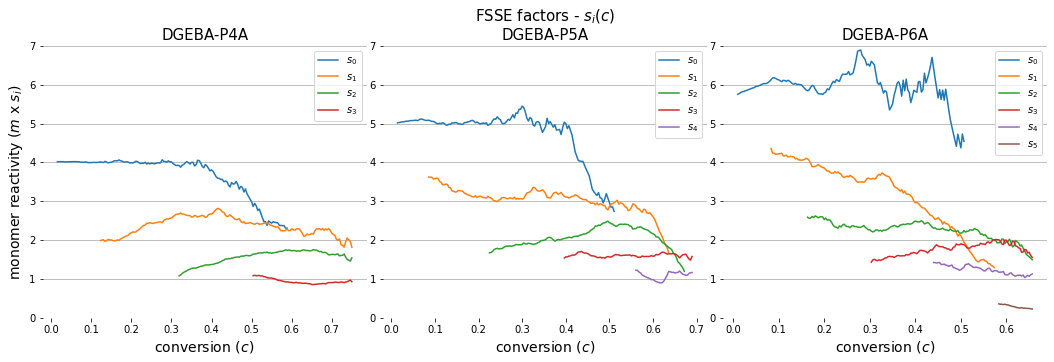

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.05)

labels = ["$s_0$", "$s_1$", "$s_2$", "$s_3$", "$s_4$", "$s_5$"]


for i in range(len(conversion_dict["dgeba-p4a"])):
    if i == 0:
        ax[0].plot(conversion_dict["dgeba-p4a"][i][:-42], fsse_dict["dgeba-p4a"][i][:-42], label=labels[i])
    else:
        ax[0].plot(conversion_dict["dgeba-p4a"][i], fsse_dict["dgeba-p4a"][i], label=labels[i])


for i in range(len(conversion_dict["dgeba-p5a"])):
    if i == 0:
        ax[1].plot(conversion_dict["dgeba-p5a"][i][:-50], fsse_dict["dgeba-p5a"][i][:-50], label=labels[i])
    elif i == 1:
        ax[1].plot(conversion_dict["dgeba-p5a"][i][:-15], fsse_dict["dgeba-p5a"][i][:-15], label=labels[i])
    elif i == 2:
        ax[1].plot(conversion_dict["dgeba-p5a"][i][:-5], fsse_dict["dgeba-p5a"][i][:-5], label=labels[i])
    else:
        ax[1].plot(conversion_dict["dgeba-p5a"][i], fsse_dict["dgeba-p5a"][i], label=labels[i])

for i in range(len(conversion_dict["dgeba-p6a"])):
    if i == 0:
        ax[2].plot(conversion_dict["dgeba-p6a"][i][:-45], fsse_dict["dgeba-p6a"][i][:-45], label=labels[i])
    elif i == 1:
        ax[2].plot(conversion_dict["dgeba-p6a"][i][4:-25], fsse_dict["dgeba-p6a"][i][4:-25], label=labels[i])
    else:
        ax[2].plot(conversion_dict["dgeba-p6a"][i], fsse_dict["dgeba-p6a"][i], label=labels[i])
ax[0].set_title("DGEBA-P4A", fontsize=15)
ax[1].set_title("FSSE factors - $s_i(c)$\nDGEBA-P5A", fontsize=15)
ax[2].set_title("DGEBA-P6A", fontsize=15)
ax[0].set_ylabel("monomer reactivity ($m$ x $s_i$)", fontsize=14)
for i in range(3):
    ax[i].set_ylim([0, 7])
    ax[i].grid(axis='y')
    ax[i].set_xlabel("conversion ($c$)", fontsize=14)
    ax[i].legend(frameon=True)
    for spine in ["top", "bottom", "left", "right"]:
        ax[i].spines[spine].set_visible(False)

plt.savefig(f"{PATH}/fsse_factors.png", bbox_inches="tight")

### Write fsse data

In [41]:
conversion_dict["dgeba-p4a"][0] = conversion_dict["dgeba-p4a"][0][:-42]
fsse_dict["dgeba-p4a"][0] = fsse_dict["dgeba-p4a"][0][:-42]

conversion_dict["dgeba-p5a"][0] = conversion_dict["dgeba-p5a"][0][:-50]
fsse_dict["dgeba-p5a"][0] = fsse_dict["dgeba-p5a"][0][:-50]
conversion_dict["dgeba-p5a"][1] = conversion_dict["dgeba-p5a"][1][:-15]
fsse_dict["dgeba-p5a"][1] = fsse_dict["dgeba-p5a"][1][:-15]
conversion_dict["dgeba-p5a"][2] = conversion_dict["dgeba-p5a"][2][:-5]
fsse_dict["dgeba-p5a"][2] = fsse_dict["dgeba-p5a"][2][:-5]

conversion_dict["dgeba-p6a"][0] = conversion_dict["dgeba-p6a"][0][:-45]
fsse_dict["dgeba-p6a"][0] = fsse_dict["dgeba-p6a"][0][:-45]
conversion_dict["dgeba-p6a"][1] = conversion_dict["dgeba-p6a"][1][4:-25]
fsse_dict["dgeba-p6a"][1] = fsse_dict["dgeba-p6a"][1][4:-25]

for run in conversion_dict:
    f = open(run + "_conv.data", 'w')
    g = open(run + "_fsse.data", 'w')
    diff = conversion_dict[run][0][1] - conversion_dict[run][0][0]
    c = np.arange(conversion_dict[run][0][0], 1 + diff, diff)
    for c_ in c:
        f.write(str(c_) + "\n")

    for i in range(len(conversion_dict[run])):
        j = 0
        for c_ in c:
            if c_ < conversion_dict[run][i][0]:
                g.write(str(fsse_dict[run][i][0]) + " ")
            elif c_ > conversion_dict[run][i][-1]:
                g.write(str(fsse_dict[run][i][-1]) + " ")
            else:
                g.write(str(fsse_dict[run][i][j]) + " ")
                j += 1
        g.write("\n")

    f.close(), g.close()